In [9]:
using Latexify
using LaTeXStrings
using LinearAlgebra
using Random
using SymPy
using RowEchelon
using Plots
gr()

# Defaults for Latexify
set_default(env=:raw, starred=true)

# Use the same seed for all random problems
seed0 = 1233
myseed() =  Random.seed!(seed0);
myseed(s) =  Random.seed!(seed0+s);

# Often used dimensions
n0 = 6;
n1 = 3;

# range of entries in a randomatrix
S0 = -1:5;

# Some helper functions for making plots
xs_ys(vs) = Tuple(eltype(vs[1])[vs[i][j] for i in 1:length(vs)] for j in eachindex(first(vs)));
xs_ys(v,vs...) = xs_ys([v, vs...]);
xs_ys(r::Function, a, b, n=100) = xs_ys(r.(range(a, stop=b, length=n)));

tofloat(x) = convert(Float64, x);

# Generate a singular matrix
function randsing(S, m, n)
    while true
        A = rand(S, (m, n))
        if det(A) == 0
            return A
        end
    end
end;

randsing(n) = randsing(S0, n, n)
randsing(S, n) = randsing(S, n, n)

# Generate a non-singular matrix
function randnonsing(S, m, n)
    while true
        A = rand(S, (m, n))
        if det(A) != 0
            return A
        end
    end
end;

randnonsing(n) = randnonsing(S0, n, n)
randnonsing(S, n) = randnonsing(S, n, n)

# LaTeX helper functions

# Generate LaTeX of an empty matrix for student to fill in
function emptymat(m, n)
    r = fill("\\underline{\\hspace{1cm}}", n)
    r = join(r, "& ")
    m = fill(r, m)
    m = join(m, "\\\\\n")
    return "\\begin{bmatrix}" * m * "\\end{bmatrix}"
end;
emptymat(n) = emptymat(n, n);

# Generate LaTeX of a partially revealed matrix
function partialmat(mat, rows)
    (m, n) = size(mat)
    r = fill("\\underline{\\hspace{1cm}}", n)
    r = join(r, "& ")
    r *= "\\\\\n"
    s = ""
    for i in 1:m
        if i in rows
            r1 = join([latexify(x) for x in mat[i, :]],"& ")
            r1 *= "\\\\\n"
            s *= r1 
        else
            s *= r
        end
    end
    return "\\begin{bmatrix}" * s * "\\end{bmatrix}"
end;

# Generate a long empty space for student to write proofs
answerblock(h) = LaTeXString("""Answer:

\\vspace{$(h)pt}
""");
answerblock() = answerblock(180)

# Print a matrix to a set of vectors in LaTeX
function tovecset(mat)
    ptstext = join([latexify(c) for c in eachcol(mat)], ", ")
    return L"$$\left\{%$ptstext\right\}$$"
end;

<!-- To define marcros that can be both used in Jupyter Lab and LaTeX 
See https://discourse.jupyter.org/t/how-to-define-a-macro-in-a-jupyter-cell/7967/5?u=newptcai
-->
<div hidden>
\newcommand{\require}[1]{}

$$\require{begingroup}\require{newcommand}$$
$$
\gdef\dsR{{\mathbb{R}}}
$$

\vskip-\parskip
\vskip-\baselineskip
</div>

Full Name: $\underline{\hspace{5cm}}$   NetID: $\underline{\hspace{5cm}}$

Honor Pledge: I will neither give nor receive aid on this assessment.

Signature: $\underline{\hspace{5cm}}$

Note: 

1. Don't look inside until the exam starts.
2. Each question counts as 1 pt.
3. When answering multiple choice questions, only check the boxes before correct answers.
4. A proof must be written with **correct** English grammar and mathematical notations to receive full points.

Good luck!

# Solution sets

Solve the linear system with the augmented matrix

In [10]:
Random.seed!(seed0)
A = randsing(3)
x0 = rand(S0, 3)
y = A * x0
B = hcat(A, y)
latexify(B, env=:eq)

L"\begin{equation*}
\left[
\begin{array}{cccc}
-1 & 3 & 1 & 18 \\
1 & 1 & 2 & 8 \\
1 & 5 & 5 & 34 \\
\end{array}
\right]
\end{equation*}
"

In [11]:
xs = [Sym("x$i") for i in 1:3]
B1 = sympy.Matrix([A zeros(Int, 3)])
sol = [sympy.linsolve(B1, xs[1], xs[2], xs[3]).args[1].args...];

In [12]:
sol1 = latexify(sol[1].subs(xs[3], 1));

Answer:

The solution set is of the form

In [48]:
L"""$$
\begin{bmatrix}
%$(x0[1]) \\
\underline{\hspace{2cm}} \\
\underline{\hspace{2cm}} \\
\end{bmatrix}
+
s
\begin{bmatrix}
%$(sol1) \\
\underline{\hspace{2cm}} \\
\underline{\hspace{2cm}} \\
\end{bmatrix}
,
\qquad
s \in \mathbb{R}
$$
"""

L"$$
\begin{bmatrix}
-1 \\
\underline{\hspace{2cm}} \\
\underline{\hspace{2cm}} \\
\end{bmatrix}
+
s
\begin{bmatrix}
\frac{-5}{4} \\
\underline{\hspace{2cm}} \\
\underline{\hspace{2cm}} \\
\end{bmatrix}
,
\qquad
s \in \mathbb{R}
$$
"

# Linear independence

Find the value of $h$ which makes the columns of the following matrix linearly **dependent**

In [14]:
Random.seed!(seed0 + 5)
A = sympy.Matrix(rand(-1:3,(4,4)))
h = Sym("h")
A[3,3] = h
latexify(A, env=:eq)

L"\begin{equation*}
\left[
\begin{array}{cccc}
3 & -1 & 1 & 2 \\
1 & 3 & 1 & 3 \\
1 & 0 & h & -1 \\
1 & 3 & 2 & 1 \\
\end{array}
\right]
\end{equation*}
"

Answer: $h = \underline{\hspace{5cm}}$

In [15]:
sympy.solve(det(A));

# Linear transformations

Which statements are always true?

* [ ] A linear transformation $T: \mathbb{R}^n \mapsto \mathbb{R}^m$ is completely determined by its effect on the columns of the $n \times n$ identity matrix.
* [ ] If $T: \mathbb{R}^2 \mapsto \mathbb{R}^2$ rotates vectors about the origin through an angle $\phi$, then $T$ is a linear transformation.
* [ ] When two linear transformations are performed one after another, the combined effect is always a linear transformation.
* [ ] Every linear transformation from $\mathbb{R}^n$ to $\mathbb{R}^m$ is also a matrix transformation.
* [ ]  A mapping $T : \mathbb{R}^n \mapsto \mathbb{R}^m$ is one-to-one if each vector in $\mathbb{R}^n$ maps onto a unique vector in $\mathbb{R}^m$.

# Linear transformations

Find the matrix which transforms the picture on the left to the one on the right.

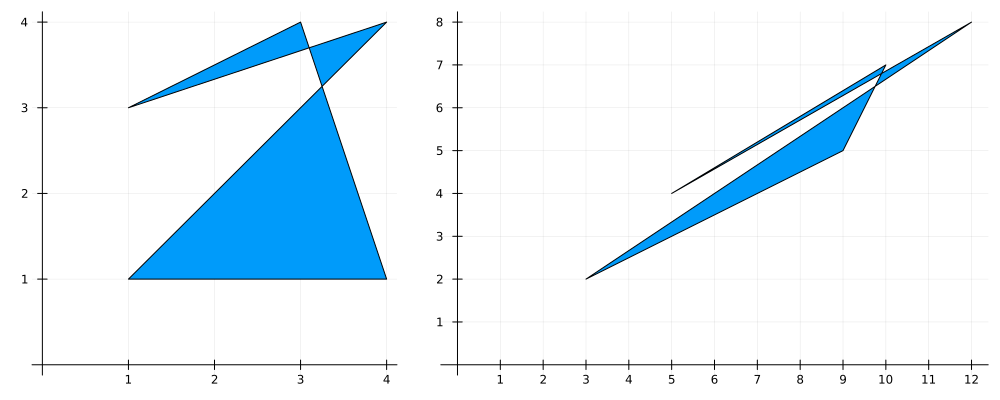

In [17]:
myseed(seed0+2)
pts = hcat(rand(1:4, (2,5)))
T = randnonsing(0:2, 2)
pts1 = T * pts
pic = Plots.plot(Shape(pts[1, :], pts[2, :]),
    apsect_ratio = 1,
    legend = nothing,
    framestyle = :origin,
    size = (400, 400)
)
savefig(pic, "images/art.png")
xup = maximum(pts1[1, :])
yup = maximum(pts1[2, :])
pic1 = Plots.plot(Shape(pts1[1, :], pts1[2, :]),
    aspect_ratio = 1,
    legend = nothing,
    framestyle = :origin,
    xticks = 0:1:xup,
    yticks = 0:1:yup,
)

plot(pic, pic1, layout=grid(1, 2, widths=[0.4, 0.6]), size=(1000, 400))

Answer:

In [18]:
L"$$%$(emptymat(2))$$"

L"$$\begin{bmatrix}\underline{\hspace{1cm}}& \underline{\hspace{1cm}}\\
\underline{\hspace{1cm}}& \underline{\hspace{1cm}}\end{bmatrix}$$"

In [20]:
@syms a, b, c, d
T1 = [a b; c d]
solve(vcat([Eq.(T1*pts[:, i], pts1[:, i]) for i in 1:2]...));

# Invertible matrices

Find the inverse of

In [21]:
myseed()
A = zeros(Int, (5, 5))
for i in 1:5
    for j in 1:i
        A[i, j] =j
    end
end
latexify(A, env=:eq)

L"\begin{equation*}
\left[
\begin{array}{ccccc}
1 & 0 & 0 & 0 & 0 \\
1 & 2 & 0 & 0 & 0 \\
1 & 2 & 3 & 0 & 0 \\
1 & 2 & 3 & 4 & 0 \\
1 & 2 & 3 & 4 & 5 \\
\end{array}
\right]
\end{equation*}
"

In [22]:
sympy.Matrix(A)^(-1);

Hint: Do some experiments and make a guess.

Answer:

In [23]:
L"$$%$(emptymat(5,5))$$"

"\$\$\\begin{bmatrix}\\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}\\\\\n\\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{" ⋯ 143 bytes ⋯ "erline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}\\\\\n\\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}\\end{bmatrix}\$\$"

# LU factorization

In [24]:
myseed(seed0+1)
U = UpperTriangular(randnonsing(2:6, 3))
U = [U; zeros(Int, (1,3))]
L = LowerTriangular(randnonsing(-1:5, 4))
A = L*U
for i in 1:4
    L[i, i] = 1
end
L
x = rand(-1:3, 3);
b = A * x;

Using the given LU-factorization to solve the linear system $A x = b$ where

In [25]:
L"""
$$
A = 
%$(latexify(L))
%$(latexify(U))
,
\qquad
b
=
%$(latexify(b))
$$
"""

L"$$
A = 
\left[
\begin{array}{cccc}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
2 & 2 & 1 & 0 \\
0 & 0 & 4 & 1 \\
\end{array}
\right]
\left[
\begin{array}{ccc}
3 & 2 & 2 \\
0 & 5 & 3 \\
0 & 0 & 2 \\
0 & 0 & 0 \\
\end{array}
\right]
,
\qquad
b
=
\left[
\begin{array}{c}
36 \\
6 \\
18 \\
-8 \\
\end{array}
\right]
$$
"

In [26]:
xs = [Sym("x$i") for i in 1:4]
B1 = sympy.Matrix([A b])
sol = [sympy.linsolve(B1, xs[1], xs[2], xs[3]).args[1].args...];

Answer:

In [27]:
L"""
$$
x = 
%$(emptymat(3, 1))
$$
"""

L"$$
x = 
\begin{bmatrix}\underline{\hspace{1cm}}\\
\underline{\hspace{1cm}}\\
\underline{\hspace{1cm}}\end{bmatrix}
$$
"

In [28]:
A1 = sympy.Matrix([A zeros(Int, 4)])
sympy.linsolve(A1);

# Determinants

Let $A$ be an $n \times n$ matrix.
Which of the following statements are always true?

* [ ] The determinant of $A$ is the product of the pivots in any echelon form $U$ of $A$, multiplied by $(−1)^r$, where r is the number of row interchanges made during row reduction from $A$ to $U$.
* [ ] If the columns of $A$ are linearly dependent, then $\det A = 0$.
* [ ] Adding a multiple of one row to another does not affect the determinant of a matrix.
* [ ] If $C$ is a $2 \times 2$ matrix with a zero determinant, then one column of $C$ is a multiple of the other.
* [ ] $\det(AA^T) \ge 0$.

# Volumes

Compute the volume of the tetrahedron with vertcies

In [29]:
myseed(seed0 + 1)
pts = rand(-3:1, (3,4))
(x, y, z) = eachrow(pts)
tovecset(pts)

L"$$\left\{\left[
\begin{array}{c}
-2 \\
-1 \\
0 \\
\end{array}
\right], \left[
\begin{array}{c}
-3 \\
0 \\
-2 \\
\end{array}
\right], \left[
\begin{array}{c}
-3 \\
-2 \\
-3 \\
\end{array}
\right], \left[
\begin{array}{c}
0 \\
-2 \\
-1 \\
\end{array}
\right]\right\}$$"

Answer: $\underline{\hspace{5cm}}$

In [30]:
pts1 = copy(pts)
for i in 2:4
    pts1[:, i] -= pts1[:, 1]
end
pts1[:, 1] = zeros(3)
pts1
abs(det(pts1[:, 2:end]));

# Ranks

Let $u, v \in \mathbb{R}^n$. Prove that $\mathrm{rank}(u v^T) \le 1$.

In [31]:
answerblock(150)

L"Answer:

\vspace{150pt}
"

# Vector space

Let $\mathbb{R}^{3 \times 3}$ be the vector space of $3 \times 3$ matrices.
Which of the following subsets of $\mathbb{R}^{3 \times 3}$ are subspaces of $\mathbb{R}^{3 \times 3}$?

* [ ] The $3 \times 3$ matrices A such that the vector $(0, 8, 6)$ is in the null space of $A$.
* [ ] The $3 \times 3$ matrices whose entries are all integers
* [ ] The $3 \times 3$ matrices in reduced row-echelon form 
* [ ] The diagonal $3 \times 3$ matrices
* [ ] The $3 \times 3$ matrices of rank $3$

# Change of basis

Let $\mathcal B$ and $\mathcal C$ be two bases of $\mathbb{R}^3$ forme by the columns of $B$ and $C$ respectively where

In [32]:
myseed()
B = randnonsing(2)
C = randnonsing(2)
L"$$B = %$(latexify(B)), \qquad C = %$(latexify(C))$$"

L"$$B = \left[
\begin{array}{cc}
3 & 3 \\
4 & 2 \\
\end{array}
\right], \qquad C = \left[
\begin{array}{cc}
1 & 5 \\
5 & 5 \\
\end{array}
\right]$$"

Find the change-of-coordinates matrix from $\mathcal B$ to $\mathcal C$ 
and the change-of-coordinates matrix from $\mathcal C$ to $\mathcal B$.

In [33]:
L"""Answer:

$$
\underset{\mathcal C \leftarrow \mathcal B}{P}
=
%$(emptymat(2))
,
\qquad
\underset{\mathcal B \leftarrow \mathcal C}{P}
=
%$(emptymat(2))
$$
"""

L"Answer:

$$
\underset{\mathcal C \leftarrow \mathcal B}{P}
=
\begin{bmatrix}\underline{\hspace{1cm}}& \underline{\hspace{1cm}}\\
\underline{\hspace{1cm}}& \underline{\hspace{1cm}}\end{bmatrix}
,
\qquad
\underset{\mathcal B \leftarrow \mathcal C}{P}
=
\begin{bmatrix}\underline{\hspace{1cm}}& \underline{\hspace{1cm}}\\
\underline{\hspace{1cm}}& \underline{\hspace{1cm}}\end{bmatrix}
$$
"

In [34]:
latexify(rationalize.(B \ C), env=:eq);

In [35]:
latexify(rationalize.(C \ B), env=:eq);

# Eigenvalues

Find  $\lambda$, the largest eigenvalue of

In [36]:
Random.seed!(seed0)
A11 = rand(-5:5, (2,2))
A22 = rand(-5:5, (2,2))
B = zeros(Int, (2,2))
A = [A11 B; B A22]
latexify(A, env=:eq)

L"\begin{equation*}
\left[
\begin{array}{cccc}
2 & 2 & 0 & 0 \\
3 & -1 & 0 & 0 \\
0 & 0 & -2 & 4 \\
0 & 0 & 5 & 4 \\
\end{array}
\right]
\end{equation*}
"

In [37]:
A1 = sympy.Matrix(A)
λ = maximum(keys(A1.eigenvals()));

In [38]:
v = Dict([t[1]=>t[3][1] for t in A1.eigenvects()])[λ];

In [39]:
L"Find also $v$, the eigenvector for $\lambda$ which has $%$(v[4])$ as its last entry."

L"Find also $v$, the eigenvector for $\lambda$ which has $1$ as its last entry."

Answer:

In [40]:
L"""
$$
\lambda
=
\underline{\hspace{3cm}} 
,
\qquad
\begin{bmatrix}
    \underline{\hspace{3cm}} \\
    \underline{\hspace{3cm}} \\
    \underline{\hspace{3cm}} \\
    %$(v[4]) \\
\end{bmatrix}
$$
"""

L"$$
\lambda
=
\underline{\hspace{3cm}} 
,
\qquad
\begin{bmatrix}
    \underline{\hspace{3cm}} \\
    \underline{\hspace{3cm}} \\
    \underline{\hspace{3cm}} \\
    1 \\
\end{bmatrix}
$$
"

In [41]:
A1 = sympy.Matrix(A)
λ = maximum(keys(A1.eigenvals()));

In [42]:
v = Dict([t[1]=>t[3][1] for t in A1.eigenvects()])[λ];

# Diagonalization

In [43]:
Random.seed!(seed0)
A = sympy.Matrix(randnonsing(3))
eivals =[λ for λ in keys(A.eigenvals())]
evals = [latexify(λ) for λ in eivals];
etext = join(evals, ", ");
(P, D) = A.diagonalize();

In [44]:
P;

In [45]:
D;

In [49]:
#L"""The matrix $A = %$(latexify(A))$ has eigenvalues $(%$etext)$.
L"""Find an invertible matrice $P$ and $\lambda_1, \lambda_2, \lambda_3 \in \mathbb{R}$ 
such that $|\lambda_1| < |\lambda_2| < |\lambda_3|$ and
$$
P
\begin{bmatrix}
\lambda_1 &  0 &  0 \\
0 &  \lambda_2 &  0 \\
0 &  0 &  \lambda_2\\
\end{bmatrix}
P^{-1}
=
%$(latexify(A))
$$
"""

L"Find an invertible matrice $P$ and $\lambda_1, \lambda_2, \lambda_3 \in \mathbb{R}$ 
such that $|\lambda_1| < |\lambda_2| < |\lambda_3|$ and
$$
P
\begin{bmatrix}
\lambda_1 &  0 &  0 \\
0 &  \lambda_2 &  0 \\
0 &  0 &  \lambda_2\\
\end{bmatrix}
P^{-1}
=
\left[
\begin{array}{ccc}
3 & 2 & 5 \\
4 & 1 & 5 \\
3 & 5 & 1 \\
\end{array}
\right]
$$
"

Answer

In [37]:
L"""$$
P
=
\begin{bmatrix}
\underline{\hspace{2cm}} &  \underline{\hspace{2cm}} &  \underline{\hspace{2cm}} \\
\underline{\hspace{2cm}} &  \underline{\hspace{2cm}} &  \underline{\hspace{2cm}} \\
%$(P[3,1]) & %$(P[3,2]) & %$(P[3,3])
\end{bmatrix}
,
\qquad
D
=
%$(emptymat(3))
$$"""

L"$$
P
=
\begin{bmatrix}
\underline{\hspace{2cm}} &  \underline{\hspace{2cm}} &  \underline{\hspace{2cm}} \\
\underline{\hspace{2cm}} &  \underline{\hspace{2cm}} &  \underline{\hspace{2cm}} \\
2 & 1 & 1
\end{bmatrix}
,
\qquad
D
=
\begin{bmatrix}\underline{\hspace{1cm}}& \underline{\hspace{1cm}}& \underline{\hspace{1cm}}\\
\underline{\hspace{1cm}}& \underline{\hspace{1cm}}& \underline{\hspace{1cm}}\\
\underline{\hspace{1cm}}& \underline{\hspace{1cm}}& \underline{\hspace{1cm}}\end{bmatrix}
$$"

# Diagonalization

Let $A, P$ and $D$ be $n \times n$ matrices.
Which of the following statements are always true?

* [ ] $A$ is diagonalizable if $A=PDP^{-1}$ for some matrix $D$ and some invertible matrix $P$.
* [ ] If $\mathbb{R}^n$ has a basis of eigenvectors of $A$, then $A$ is diagonalizable.
* [ ] If $A$ is diagonalizable, then $A$ is invertible.
* [ ] $A$ is diagonalizable  if $A$ has  $n$ eigenvectors.
* [ ] If $A$ is invertible, then $A$ is diagonalizable.

# Linear transformation

In [38]:
Random.seed!(seed0)
A = randnonsing(3)
A * [3, -8, 0];

Let $\mathcal{B} = \{b_1, b_2, b_3\}$ be a basis for a vector space $V$. 
Find $T(3 b_1 - 8 b_2)$ when $T$ is a linear transformation from $V$ to $V$ whose matrix relative to $\mathcal B$ is

In [39]:
L"""
$$
[T]_{\mathcal B} = %$(latexify(A))
$$
"""

L"$$
[T]_{\mathcal B} = \left[
\begin{array}{ccc}
3 & 2 & 5 \\
4 & 1 & 5 \\
3 & 5 & 1 \\
\end{array}
\right]
$$
"

Answer:

$$
T(3 b_1 - 8 b_2)
=
\underline{\hspace{1cm}} b_1 
+ 
\underline{\hspace{1cm}} b_2
+
\underline{\hspace{1cm}} b_3 
$$

# Discrete dynamic systems

In [40]:
myseed()
A = round.(rand(Float64, (2,2)), digits=1);

In [41]:
eigvals(A);

In [42]:
L"The origin in the discrete dynamic system $x_{k+1} = %$(latexify(A))x_k$ is a"

L"The origin in the discrete dynamic system $x_{k+1} = \left[
\begin{array}{cc}
0.7 & 0.6 \\
0.7 & 0.4 \\
\end{array}
\right]x_k$ is a"

In [43]:
V = eigvecs(A);

In [44]:
pic = scatter((0,0), legend=nothing)
for p in Iterators.product(-1:1,-1:1)
xs = 100 * V * [(p)...]
for i in 1:10
    xnext = A*xs[:, end]
    xs = hcat(xs, xnext)
end
scatter!(xs[1, :], xs[2, :])
plot!(xs[1, :], xs[2, :], arrow=true)
end
pic;

* [ ] repeller
* [ ] attractor
* [ ] saddle point
* [ ] pivot point
* [ ] non above

# Orthogonal projection

Which of the following statements are true?

* [ ] If the columns of an $m \times n$ matrix $A$ are orthonormal, then the linear mapping $x \mapsto Ax$ preserves lengths.
* [ ] Every orthogonal set in $\mathbb{R}^n$ is linearly independent.
* [ ] The orthogonal projection of $y$ onto $v$ is the same as the orthogonal projection of $y$ onto $c v$ whenever $c \ne 0$.
* [ ] An orthogonal matrix is invertible.
* [ ] If a set $S = \{u_1, \ldots, u_p\}$  has the property that $u_i \cdot u_j = 0$ whenever $i \ne j$,  then S is an orthogonal set.

# QR Factorization

Find a QR Factorization of $A$ where

In [45]:
Random.seed!(seed0)
A = rand(-1:2, (5, 3))
Al = latexify(A)
L"$$A = %$Al$$"

L"$$A = \left[
\begin{array}{ccc}
1 & 2 & 1 \\
1 & 2 & 2 \\
1 & 2 & -1 \\
0 & 0 & 0 \\
0 & -1 & 2 \\
\end{array}
\right]$$"

In [46]:
(x1, x2, x3) = collect(eachcol(A))
v1 = x1
v2 = x2 - dot(v1, x2)//dot(v1, v1)*v1
v3 = x3 - dot(v1, x3)//dot(v1, v1)*v1 - dot(v2, x3)//dot(v2, v2)*v2
W = hcat(v1, v2, v3)
latexify(W, env=:eq)

W1 = [sqrt(Sym(dot(W[:,i], W[:,i]))) for i in 1:3]
Q1 = hcat([W[:, i] / W1[i] for i in 1:3]...);

In [47]:
R1 = Q1'*A;

In [48]:
A == Q1 * R1;

Answer:

In [49]:
L"""
$$
Q = %$(partialmat(Q1, [1]))
,
\qquad
R = %$(partialmat(R1, [1]))
.
$$
"""

"\$\$\nQ = \\begin{bmatrix}\\frac{\\sqrt{3}}{3}& 0& \\frac{\\sqrt{42}}{42}\\\\\n\\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}\\\\\n\\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}\\\\\n\\underline{\\hspace{1cm}}& \\underline{\\hspace{" ⋯ 119 bytes ⋯ "matrix}\n,\n\\qquad\nR = \\begin{bmatrix}\\sqrt{3}& 2 \\cdot \\sqrt{3}& \\frac{2 \\cdot \\sqrt{3}}{3}\\\\\n\\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}\\\\\n\\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}& \\underline{\\hspace{1cm}}\\\\\n\\end{bmatrix}\n.\n\$\$\n"

# Least-squares lines

Find the equation $y = \beta_0 + \beta_1 x$ of the least-squares line that best fit the given data

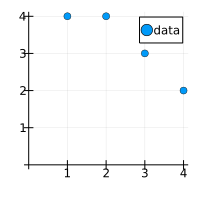

In [50]:
myseed()
ys = rand(0:5, 4)
xs = range(1, 4, step=1)
pic = scatter(xs, ys, label="data", size=(200, 200), framestyle=:origin)
#savefig(pic, "images/data.png")
#pic

Answer: $(\beta_0, \beta_1) = (\underline{\hspace{2cm}}, \underline{\hspace{2cm}})$

In [51]:
## draw the picture

xs1 = fill(1, 4)
X = hcat(xs1, xs)
β = round.(X \ ys, digits=6);

In [52]:
line(x) = dot(β, [1 x])
@syms x
plot(pic, line, label = L"y = %$(latexify(line(x)))");

# Orthonormal bases

An orthogonal matrix is a square invertible matrix $U$ such that $U^{-1} = U^T$. Such a matrix has orthonormal columns.

Let $U$ be an $n \times n$ orthogonal matrix. Show that the rows of $U$ form an orthonormal basis of $\mathbb{R}^n$.

In [53]:
answerblock()

L"Answer:

\vspace{180pt}
"

In [54]:
myseed()
A = randnonsing(5)
V = A[:, 1]
for i in 2:5
    x = A[:, i]
    x0 = copy(x)
    for j in 1:i-1
        v = V[:, j]
        x0 -= dot(x, v)/dot(v, v) * v
    end
    V = hcat(V, x0)
end
for i in 1:5
    v = V[:, i]
    V[:, i] = v / norm(v)
end
V
norm.(eachcol(V));

In [55]:
norm.(eachrow(V));

# Bonus question

Define a linear transformation 
$T : \mathbb{P}^2 \mapsto \mathbb{R}^2$ 
by $T(p) = \begin{bmatrix}p(0) \\ p(0)\end{bmatrix}$. 
Find polynomials $p_1$ and $p_2$ that span the kernel of $T$, and describe the range of $T$.

In [56]:
answerblock()

L"Answer:

\vspace{180pt}
"

# Bonus question

Guess the inverse of the $n \times n$ matrix

$$
\begin{bmatrix}
   1 & 0 & 0 & 0 & \dots & 0 \\
   1 & 1 & 0 & 0 & \dots & 0 \\
   1 & 1 & 1 & 0 & \dots & 0 \\
   1 & 1 & 1 & 1 & \dots & 0 \\
   \vdots & \vdots & \vdots & \vdots &  & 0 \\
   1 & 1 & 1 & \dots & 1 & 0 \\
   1 & 1 & 1 & \dots & 1 & 1 \\
\end{bmatrix}
$$

and prove that your guess is correct.

In [47]:
answerblock(350)

L"Answer:

\vspace{350pt}
"